![](https://pasteboard.co/JpRfyXe.png)

![](https://cdn1.bbcode0.com/uploads/2020/9/6/7e31d7483bde672cf3cfdbc5790c5433-full.png)

***

`Contents of the notebook`
```
1. Data explnation
2. Model Building
   a. Voting
   b. Boosting
   c. Bagging
3. Hyperparameter tuning
4. SHAP model
```

***

# <span style="font-family:Bahnschrift SemiBold"><span style="color:pink"> In this notebook... </span>

You will discover how you can create some of the most powerful types of ensembles in Python using scikit-learn. A basic classification problem used which is the Pima Indians onset of diabetes dataset.
It is a binary classification problem where all of the input (independent) variables are numeric and have differing scales. 

> <mark>note:</mark> Each ensemble algorithm is demonstrated using fold cross validation, a standard technique used to estimate the performance of any machine learning algorithm on unseen data. 



***



# <span style="color:pink"><span style="font-family:Candara">  Data Description </span>&#10024;


#####  <span style="color:#008080">Attributes:</span> 

1. Number of times pregnant
2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test
3. Diastolic blood pressure (mm Hg)
4. Triceps skin fold thickness (mm)
5. 2-Hour serum insulin (mu U/ml)
6. Body mass index (weight in kg/(height in m)^2)
7. Diabetes pedigree function
8. Age (years)
9. Class variable (0 or 1)

#####  <span style="color:#008080">Class Distribution:</span> 
(class value 1 is interpreted as "tested positive for diabetes")

|Class Value|Number of instances|
|------|------|
|0     |500     |
|1     |268     |


####  <span style="color:#008080">You can learn more about the dataset here:</span> 

1. Dataset File:  [click here](https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.csv) 

2. Dataset Details: [click here](https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.names)
***

        

<div class="alert alert-block alert-danger"><b>&#10071;  Note:</b> your model results may vary from my results, given the stochastic nature of the algorithm or evaluation procedure, or differences in numerical precision. Please, consider running the example a few times.</div>

 ***


# <span style="color:#87CEEB"><span style="font-family:Candara">  First: Voting Ensemble for Classification </span>


> **Majority Voting** is one of the simplest ways of combining the predictions from multiple machine learning algorithms.The predictions of the sub-models can be weighted, but specifying the weights for classifiers is difficult. However,you can learn how to best weight the predictions from submodels by using **stacking** :

    1.Majority Voting Ensemble Learning
    2.Stacked Generalization (stacking)

##  <span style="color:#008080">1. Majority Voting Ensemble Learning</span> 

In [15]:
# Voting Ensemble for Classification
import warnings
warnings.filterwarnings("ignore")
import pandas
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = pandas.read_csv(url, names=names)
array = dataframe.values
X = array[:,0:8]
Y = array[:,8]
seed = 7
kfold = model_selection.KFold(n_splits=10, random_state=seed)
# create the sub models
estimators = []
model1 = LogisticRegression()
estimators.append(('logistic', model1))
model2 = DecisionTreeClassifier()
estimators.append(('cart', model2))
model3 = SVC()
estimators.append(('svm', model3))
# create the ensemble model
ensemble = VotingClassifier(estimators)
results = model_selection.cross_val_score(ensemble, X, Y, cv=kfold)
print(results.mean())

0.762987012987013


##  <span style="color:#008080">2. Stacked Generalization (stacking) </span> 

In [4]:
# compare ensemble to each baseline classifier
import pandas
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import StackingClassifier
from matplotlib import pyplot





# get the dataset
def get_dataset():
    url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
    names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
    dataframe = pandas.read_csv(url, names=names)
    array = dataframe.values
    X = array[:,0:8]
    y = array[:,8]
    return X, y

# get a stacking ensemble of models
def get_stacking():
    # define the base models
    level0 = list()
    level0.append(('lr', LogisticRegression()))
    level0.append(('knn', KNeighborsClassifier()))
    level0.append(('cart', DecisionTreeClassifier()))
    level0.append(('svm', SVC()))
    level0.append(('bayes', GaussianNB()))
    # define meta learner model
    level1 = LogisticRegression()
    # define the stacking ensemble
    model = StackingClassifier(estimators=level0, final_estimator=level1, cv=5)
    return model

# get a list of models to evaluate
def get_models():
    models = dict()
    models['lr'] = LogisticRegression()
    models['knn'] = KNeighborsClassifier()
    models['cart'] = DecisionTreeClassifier()
    models['svm'] = SVC()
    models['bayes'] = GaussianNB()
    models['stacking'] = get_stacking()
    return models

# evaluate a give model using cross-validation
def evaluate_model(model, X, y):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
    return scores

# define dataset
X, y = get_dataset()
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model(model, X, y)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))

>lr 0.773 (0.040)
>knn 0.717 (0.040)
>cart 0.698 (0.055)
>svm 0.757 (0.040)
>bayes 0.759 (0.055)
>stacking 0.767 (0.045)


***

# <span style="color:#87CEEB"><span style="font-family:Candara">  Second : Boosting Algorithms </span>


> **Boosting** ensemble algorithms creates a sequence of models that attempt to correct the mistakes of the models before them in the sequence.
Once created, the models make predictions which may be weighted by their demonstrated accuracy and the results are combined to create a final output prediction.
The two most common boosting ensemble machine learning algorithms are:
    1. AdaBoost
    2. Stochastic Gradient Boosting


##  <span style="color:#008080">1. AdaBoost Classification</span> 

In [4]:
# AdaBoost Classification
import pandas
from sklearn import model_selection
from sklearn.ensemble import AdaBoostClassifier
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = pandas.read_csv(url, names=names)
array = dataframe.values
X = array[:,0:8]
Y = array[:,8]
seed = 7
num_trees = 30
kfold = model_selection.KFold(n_splits=10, random_state=seed)
model = AdaBoostClassifier(n_estimators=num_trees, random_state=seed)
results = model_selection.cross_val_score(model, X, Y, cv=kfold)
print(results.mean())

0.760457963089542


##  <span style="color:#008080">2. Stochastic Gradient Boosting Classification</span> 

In [6]:
# Stochastic Gradient Boosting Classification
import pandas
from sklearn import model_selection
from sklearn.ensemble import GradientBoostingClassifier
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = pandas.read_csv(url, names=names)
array = dataframe.values
X = array[:,0:8]
Y = array[:,8]
seed = 7
num_trees = 100
kfold = model_selection.KFold(n_splits=10, random_state=seed)
model = GradientBoostingClassifier(n_estimators=num_trees, random_state=seed)
results = model_selection.cross_val_score(model, X, Y, cv=kfold)
print(results.mean())

0.7681989063568012


***

# <span style="color:#87CEEB"><span style="font-family:Candara">  Third: Bagging Algorithms </span>


> **Bootstrap Aggregation** or **bagging** involves taking multiple samples from your training dataset (with replacement) and training a model for each sample.
The final output prediction is averaged across the predictions of all of the sub-models.
The three bagging models covered in this section are as follows:
    1. Bootstrap Aggregation
       a.Bagged Decision Trees
       b.Bagged Logistic regression
    2. Extra Trees
    3. Random Forest



##  <span style="color:#008080">1. Bootstrap Aggregation</span> 

###  <span style="color:#778899">a. Bagged Decision Trees</span> 

In [28]:
# Bagged Decision Trees for Classification
import pandas
from sklearn import model_selection
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = pandas.read_csv(url, names=names)
array = dataframe.values
X = array[:,0:8]
Y = array[:,8]
seed = 7
kfold = model_selection.KFold(n_splits=10, random_state=seed)
cart = DecisionTreeClassifier()
num_trees = 100
model = BaggingClassifier(base_estimator=cart, n_estimators=num_trees, random_state=seed)
results = model_selection.cross_val_score(model, X, Y, cv=kfold)
print(results.mean())

0.770745044429255


###  <span style="color:#778899">b. Bagged Logistic regression</span> 

In [13]:
# Bagged Logistic regression for Classification
import warnings
warnings.filterwarnings("ignore")
import pandas
from sklearn import model_selection
from sklearn.ensemble import BaggingClassifier
from sklearn.linear_model import LogisticRegression
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = pandas.read_csv(url, names=names)
array = dataframe.values
X = array[:,0:8]
Y = array[:,8]
seed = 7
kfold = model_selection.KFold(n_splits=10, random_state=seed)

model = BaggingClassifier(LogisticRegression(),n_estimators=10,bootstrap = True, random_state = 1) 

results = model_selection.cross_val_score(model, X, Y, cv=kfold)
print(results.mean())

0.7734449760765549


##  <span style="color:#008080">2. Extra Trees Classification</span> 

In [3]:
# Extra Trees Classification
import pandas
from sklearn import model_selection
from sklearn.ensemble import ExtraTreesClassifier
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = pandas.read_csv(url, names=names)
array = dataframe.values
X = array[:,0:8]
Y = array[:,8]
seed = 7
num_trees = 100
max_features = 7
kfold = model_selection.KFold(n_splits=10, random_state=seed)
model = ExtraTreesClassifier(n_estimators=num_trees, max_features=max_features)
results = model_selection.cross_val_score(model, X, Y, cv=kfold)
print(results.mean())

0.7629528366370472


##  <span style="color:#008080">3. Random Forest</span> 

In [33]:
# Random Forest Classification
import pandas
from sklearn import model_selection
from sklearn.ensemble import RandomForestClassifier
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = pandas.read_csv(url, names=names)
array = dataframe.values
X = array[:,0:8]
Y = array[:,8]
seed = 7
num_trees = 100
max_features = 3
kfold = model_selection.KFold(n_splits=5, random_state=seed) 
model = RandomForestClassifier(n_estimators=num_trees, max_features=max_features)
results = model_selection.cross_val_score(model, X, Y, cv=kfold)
print(results.mean())

0.7709192768016297


***

# <div class="alert alert-block alert-info">&#128736; Extra Practice: tuning random forest hyperparameter</div>



> <mark>Note:</mark> look at random forest hyperparameters [Click here](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)

###  <span style="color:#778899">1/ RandomizedSearchCV</span> 

In [34]:
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]

# Number of features to consider at every split
max_features = ['auto', 'sqrt']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]

# Method of selecting samples for training each tree
bootstrap = [True, False]


# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}


#---------------------------



# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = model, param_distributions = random_grid, n_iter = 100, cv = 5, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X,Y)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   16.4s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:  3.5min finished


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features=3,
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    n_estimators=100,
                                                    n_jobs=None,
      

In [35]:
rf_random.best_params_

{'n_estimators': 400,
 'min_samples_split': 10,
 'min_samples_leaf': 4,
 'max_features': 'sqrt',
 'max_depth': 90,
 'bootstrap': True}

> &#128736; <span style="color:red">Now we will replace random forest with the new hyperparameters</span> 

In [36]:
# Random Forest Classification
import pandas
from sklearn import model_selection
from sklearn.ensemble import RandomForestClassifier
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = pandas.read_csv(url, names=names)
array = dataframe.values
X = array[:,0:8]
Y = array[:,8]
seed = 7
kfold = model_selection.KFold(n_splits=5, random_state=seed)
model = RandomForestClassifier(n_estimators= 400,min_samples_split=10,min_samples_leaf=4,max_features='sqrt', max_depth= 90, bootstrap=True)
results = model_selection.cross_val_score(model, X, Y, cv=kfold)
print(results.mean())

0.780061115355233



###  <span style="color:#778899">2/ Grid search</span> 

In [29]:
from sklearn.model_selection import  GridSearchCV
import numpy as np

# Grid with only the number of trees changed
tree_grid = {'n_estimators': [int(x) for x in np.linspace(1,300,30)]}

# Create the grid search model and fit to the training data
ntree_grid_search = GridSearchCV(model, param_grid=tree_grid, verbose = 2, n_jobs=-1, cv = 10,
                                scoring = 'accuracy')
ntree_grid_search.fit(X,Y);


Fitting 10 folds for each of 30 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 142 tasks      | elapsed:   13.5s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:   34.6s finished


In [30]:
ntree_grid_search.best_params_

{'n_estimators': 165}

In [25]:
# Define a grid over only the maximum number of features
feature_grid = {'max_features': list(range(1, X.shape[1] + 1))}


tree_grid_search = GridSearchCV(model,param_grid=feature_grid, verbose = 2, n_jobs=-1, cv = 10,
                                scoring = 'accuracy')
tree_grid_search.fit(X,Y);

Fitting 10 folds for each of 8 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:    7.9s finished


In [26]:
tree_grid_search.best_params_

{'max_features': 4}

> &#128736; <span style="color:red">Now we will replace random forest with the new hyperparameters</span> 

In [27]:
# Random Forest Classification
import pandas
from sklearn import model_selection
from sklearn.ensemble import RandomForestClassifier
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = pandas.read_csv(url, names=names)
array = dataframe.values
X = array[:,0:8]
Y = array[:,8]
seed = 7
num_trees = 124
max_features = 4
kfold = model_selection.KFold(n_splits=10, random_state=seed)
model = RandomForestClassifier(n_estimators=num_trees, max_features=max_features)
results = model_selection.cross_val_score(model, X, Y, cv=kfold)
print(results.mean())

0.757758031442242





***


# <div class="alert alert-block alert-info"> &#10163; Model Interpretation:SHAP for random forest</div>



In [60]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
import shap
import pandas as pd
import numpy as np
from sklearn import model_selection
from sklearn.ensemble import RandomForestClassifier


url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = pandas.read_csv(url, names=names)
array = dataframe.values
X = array[:,0:8]
y = array[:,8]
columns=['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age']

kf = KFold(n_splits=5,shuffle=True)

list_shap_values = list()
list_test_sets = list()
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    X_train = pd.DataFrame(X_train,columns=columns)
    X_test = pd.DataFrame(X_test,columns=columns)

#training model
clf = RandomForestClassifier(random_state=0)
clf.fit(X_train, y_train)

#explaining model
explainer = shap.TreeExplainer(clf)
shap_values = explainer.shap_values(X_test)
#for each iteration we save the test_set index and the shap_values
list_shap_values.append(shap_values)
list_test_sets.append(test_index)

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


> &#10163; <span style="color:red">Now run results of SHAP as a plot </span> 

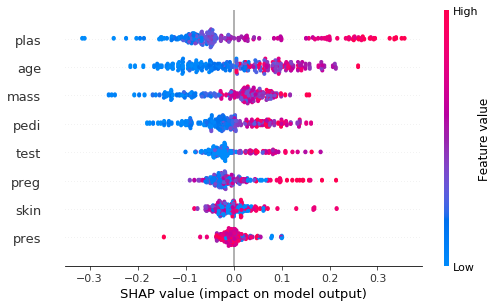

In [62]:
test_set = list_test_sets[0]
shap_values = np.array(list_shap_values[0])
for i in range(0,len(list_test_sets)):
    test_set = np.concatenate((test_set,list_test_sets[i]),axis=0)
    shap_values = np.concatenate((shap_values,np.array(list_shap_values[i])),axis=1)
#bringing back variable names    
X_test = pd.DataFrame(X[test_set],columns=columns)


#creating explanation plot for the whole experiment
shap.summary_plot(shap_values[1], X_test)



***

`Refrences:`


1. [Ref. 1](https://medium.com/@lucasramos_34338/visualizing-variable-importance-using-shap-and-cross-validation-bd5075e9063a)

2. [Ref. 2](https://towardsdatascience.com/explain-your-model-with-the-shap-values-bc36aac4de3d)

3. [Ref. 3](https://machinelearningmastery.com/ensemble-machine-learning-algorithms-python-scikit-learn)

4. [Ref. 4](https://machinelearningmastery.com/stacking-ensemble-machine-learning-with-python/)

# <span style="color:pink"><span style="font-family:Candara">  THE END </span> &#10024;&#128079;


***

![](https://cdn1.bbcode0.com/uploads/2020/9/6/37fe0065a7c5adee3248be1e91a4e051-full.png)


<nav><a href="http://www.linkedin.com/in/albtool-alaidah">LinkedIn</a> |<a href="https://github.com/Alaidah">Github</a> 